<a href="https://colab.research.google.com/github/canon14/Projects-Compilation/blob/master/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be using an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of corporations using the past 60 day stock price.


In [ ]:
#Import the libraries 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
# In this project I am using Microsoft stock and pull all the data eversince their IPO back in Sept 8,2018
df = web.DataReader('MSFT', data_source='yahoo', start='2015-11-08', end='2020-11-08') #change the end date for most recent info
#Show the data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-09,54.869999,53.560001,54.549999,54.160000,32513100.0,49.220352
2015-11-10,54.130001,53.270000,54.070000,53.509998,55283700.0,48.629631
2015-11-11,54.200001,53.459999,53.700001,53.650002,36516300.0,48.756870
2015-11-12,53.980000,53.189999,53.480000,53.320000,35361100.0,48.456959
2015-11-13,53.290001,52.529999,53.070000,52.840000,36848200.0,48.020748


In [ ]:
#Get the number of rows and columns in the data set 
df.shape

(1259, 6)

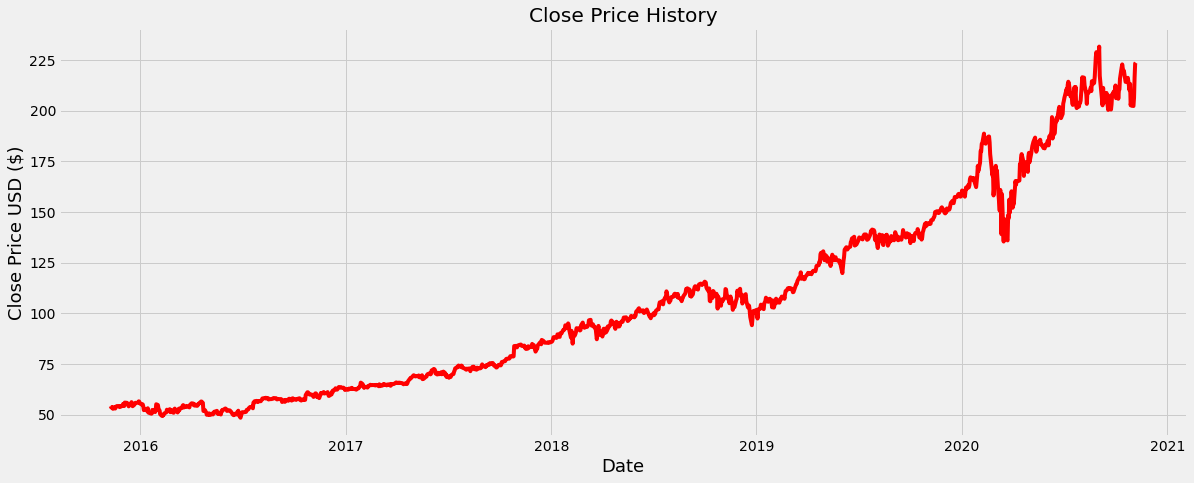

In [ ]:
# Closing price data visualization
plt.figure(figsize=(18,7))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#DATA PREPROCESSING

#Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * 0.8 )

training_data_len

1008

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:5]

array([[0.03127388],
       [0.02772622],
       [0.02849035],
       [0.02668922],
       [0.02406942]])

In [ ]:
#Create the training data set
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len , :] 

#Split the data into X_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.03127388, 0.02772622, 0.02849035, 0.02668922, 0.02406942,
       0.02914529, 0.02477896, 0.02958191, 0.03007313, 0.03143761,
       0.03143761, 0.03176509, 0.02870865, 0.03001856, 0.03231087,
       0.03705928, 0.03700469, 0.0314922 , 0.04082524, 0.04027945,
       0.04017029, 0.03574937, 0.03733217, 0.03072809, 0.03662264,
       0.03695012, 0.04202599, 0.03967908, 0.03111015, 0.03493069,
       0.03776879, 0.04033402, 0.03951533, 0.04104356, 0.0443183 ,
       0.04300841, 0.03847833, 0.03476694, 0.03613142, 0.0306735 ,
       0.02041261, 0.02128589, 0.02112214, 0.02374194, 0.01751992,
       0.02554307, 0.01397228, 0.01162537, 0.01288069, 0.01118873,
       0.02106757, 0.01833861, 0.02041261, 0.0152276 , 0.01981225,
       0.03634974, 0.03427573, 0.02494269, 0.02035804, 0.01948477])]
[0.009442198464951757]

[array([0.03127388, 0.02772622, 0.02849035, 0.02668922, 0.02406942,
       0.02914529, 0.02477896, 0.02958191, 0.03007313, 0.03143761,
       0.03143761, 0.03176509, 0.0

In [ ]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
#LSTM model expects 3 dimensions, we need to reshape our data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(948, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') #Optimizer used to improve upon loss function, Loss function used to measure how good our model on the training 

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

948/948 [==============================] - 22s 23ms/step - loss: 9.8131e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 948 to 1259
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE) (lower value is better fit)
RMSE = np.sqrt(np.mean(predictions - y_test)**2 )
RMSE

8.815655164984593

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


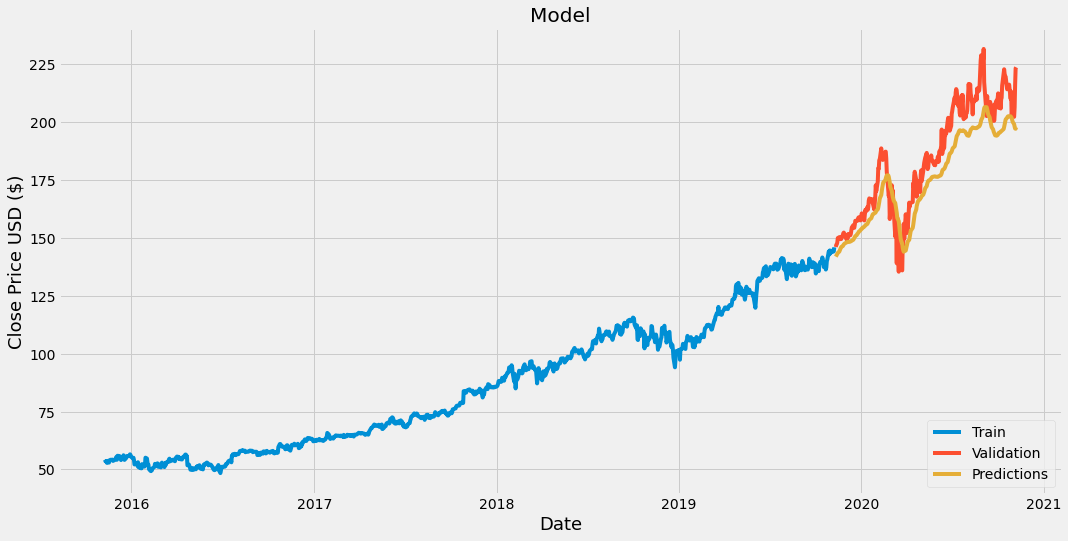

In [ ]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid 

,Close,Predictions
Date,,
2019-11-11,146.110001,141.935272
2019-11-12,147.070007,142.303452
2019-11-13,147.309998,142.708649
2019-11-14,148.059998,143.124420
2019-11-15,149.970001,143.563751
...,...,...
2020-11-02,202.330002,199.127792
2020-11-03,206.429993,198.064697
2020-11-04,216.389999,197.268906


In [ ]:
# Get the quote 
msft_quote = web.DataReader('MSFT', data_source='yahoo', start='2015-11-08', end='2020-11-08')

#Create a new dataframe
new_df = msft_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list 
X_test = []

#Append the past 60 days to X_test
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data into 3 dimensional
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[198.82913]]


In [ ]:
#Get the quote to check our prediction price
msft_quote2 = web.DataReader('MSFT', data_source='yahoo', start='2020-11-09', end='2020-11-09')
print(msft_quote2['Close'])

Date
2020-11-09    218.389999
Name: Close, dtype: float64


Result of our model is off by 20 points which is quite a bit, but we expected the price to be much lower than the actual price. Voila! hope it brings some insights for you. 